<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 1 / NOTE 2*

# 📝 Assignment
---

# 다중선형회귀(Multiple Linear Regression)

이번 과제에서도 n211 과제 에서 다루었던 housing price dataset을 가지고 배운 내용을 연습해 보겠습니다.
다음 링크에서 다운로드 받아 사용해 주세요. [House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction)

In [1]:
# 데이터는 캐글에서 받으셔도 되고 이 링크에서 불러와도 됩니다.
import pandas as pd
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kc_house_data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [3]:
df.info() # 결측치 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

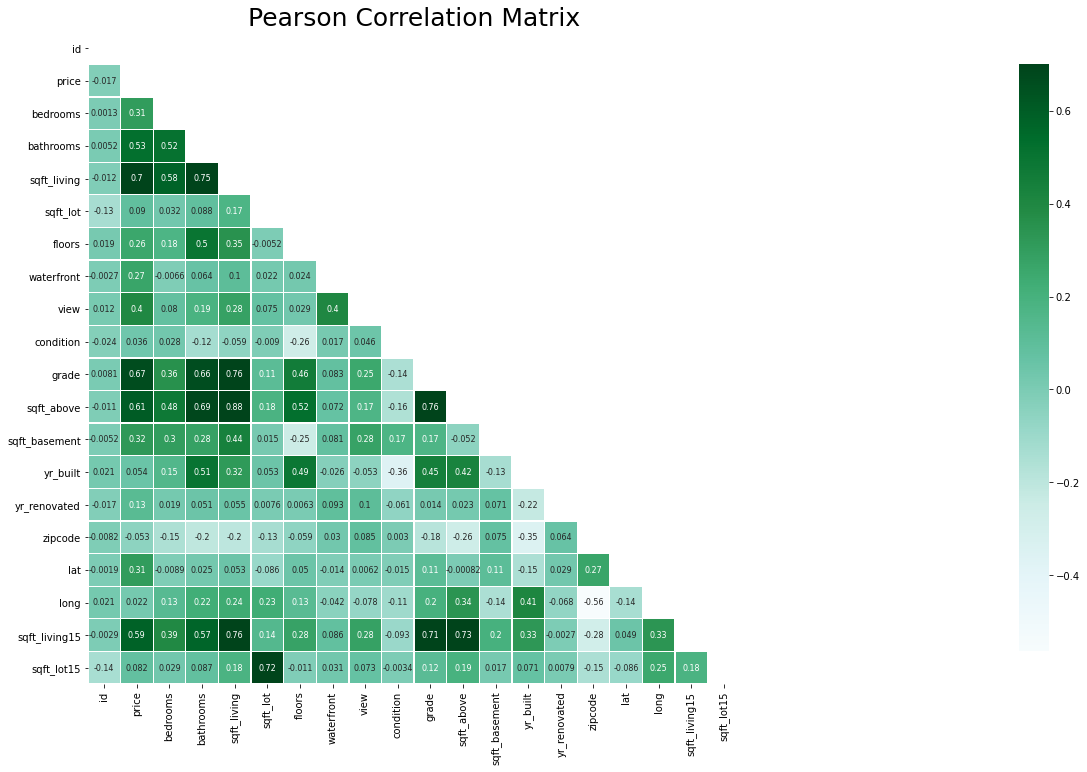

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

mask = np.zeros_like(df.corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(100, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(df.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn",
            linecolor='w',annot=True,annot_kws={"size":8},
						mask=mask,cbar_kws={"shrink": .9});

### 1) 데이터는 May 2014 ~ May 2015 의 2년치 데이터입니다. 2015-01-01 부터 큰 날짜의 데이터는 테스트, 그 이외의 데이터는 훈련 데이터셋으로 나누어 주세요
- **훈련데이터 샘플의 갯수를 과제 제출폼에 제출하세요.**

In [5]:
df = df.sort_values(by = 'date').reset_index()  # date 순으로 정렬, 인덱스 초기화
df.date = [int(i[:8]) for i in df.date]         # 연, 월, 일 순으로 숫자로 변경

In [6]:
train_data, test_data = df[df.date < 20150101], df[~(df.date < 20150101)] # test, train 데이터 분리
display(train_data)
display(test_data)

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,16768,5561000190,20140502,437500.0,3,2.25,1970,35100,2.0,0,0,4,9,1970,0,1977,0,98027,47.4635,-121.991,2340,35100
1,9596,472000620,20140502,790000.0,3,2.50,2600,4750,1.0,0,0,4,9,1700,900,1951,0,98117,47.6833,-122.400,2380,4750
2,9587,1024069009,20140502,675000.0,5,2.50,2820,67518,2.0,0,0,3,8,2820,0,1979,0,98029,47.5794,-122.025,2820,48351
3,20602,7853361370,20140502,555000.0,4,2.50,3310,6500,2.0,0,0,3,8,3310,0,2012,0,98065,47.5150,-121.870,2380,5000
4,11577,5056500260,20140502,440000.0,4,2.25,2160,8119,1.0,0,0,3,8,1080,1080,1966,0,98006,47.5443,-122.177,1850,9000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14628,4081,3321069006,20141231,905000.0,3,2.50,3520,237402,2.5,0,0,3,9,3520,0,2004,0,98092,47.2687,-122.056,2310,165963
14629,4882,1545803890,20141231,240000.0,3,1.75,1590,7931,1.0,0,0,3,7,1190,400,1979,0,98038,47.3628,-122.050,1680,7931
14630,6500,6117900010,20141231,755000.0,3,3.25,3450,15586,2.0,0,0,3,11,2690,760,1989,0,98166,47.4294,-122.343,3560,15046
14631,13152,226059161,20141231,575000.0,4,2.50,2280,27441,2.0,0,0,3,8,2280,0,1996,0,98072,47.7628,-122.123,2350,35020


,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
14633,19910,7853360990,20150102,430000.0,3,2.50,1950,4949,2.0,0,0,3,7,1950,0,2009,0,98065,47.5155,-121.870,2200,5740
14634,658,259900160,20150102,748000.0,4,3.50,2770,3330,2.0,0,0,3,8,1970,800,2001,0,98052,47.6327,-122.109,2180,3380
14635,21189,8648900010,20150102,530200.0,4,2.50,1880,3853,2.0,0,0,3,8,1880,0,2010,0,98027,47.5636,-122.094,1890,3078
14636,120,7278700070,20150102,660000.0,3,2.50,2400,6474,1.0,0,2,3,8,1560,840,1964,0,98177,47.7728,-122.386,2340,10856
14637,6633,7205930050,20150102,782000.0,4,3.50,3780,7769,2.0,0,0,3,9,3110,670,2001,0,98052,47.6910,-122.129,3310,7945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,7898,1422700040,20150514,183000.0,3,1.00,1170,7320,1.0,0,0,3,7,1170,0,1962,0,98188,47.4685,-122.282,2040,7320
21609,928,8730000270,20150514,359000.0,2,2.75,1370,1140,2.0,0,0,3,8,1080,290,2009,0,98133,47.7052,-122.343,1370,1090
21610,5637,7923600250,20150515,450000.0,5,2.00,1870,7344,1.5,0,0,3,7,1870,0,1960,0,98007,47.5951,-122.144,1870,7650
21611,13053,5101400871,20150524,445500.0,2,1.75,1390,6670,1.0,0,0,3,6,720,670,1941,0,98115,47.6914,-122.308,920,6380


### 2) 두 특성(bathrooms, sqft_living)을 사용해서 다중선형회귀 모델을 만들어 보세요
- 학습시 Parameters는 모두 기본값으로 합니다.
- **테스트세트의 MAE 값을 과제 제출폼에 제출하세요.**

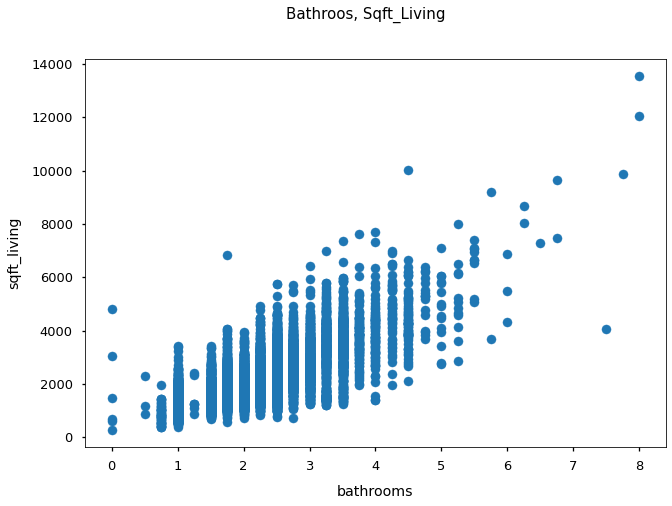

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style

style.use('seaborn-talk')
fig = plt.figure()

ax = fig.gca()

ax.scatter(train_data['bathrooms'], train_data['sqft_living'])
ax.set_xlabel('bathrooms', labelpad=12)
ax.set_ylabel('sqft_living', labelpad=10)

plt.suptitle('Bathroos, Sqft_Living', fontsize=15)
plt.show()

In [8]:
features = ['bathrooms', 'sqft_living']
# 다중모델 학습을 위한 특성
X_train = train_data[features]
X_test = test_data[features]

# label 정의
target = 'price'
y_train = train_data[target]
y_test = test_data[target]

# SalePrice 평균값으로 예측(기준모델)
predict = y_train.mean()

# 모델 fit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
train_mae = mean_absolute_error(y_train, y_pred)
print(f'훈련 에러: {train_mae:.2f}')

# 테스트 데이터에 적용해 봅시다 
y_pred = model.predict(X_test)
test_mae = mean_absolute_error(y_test, y_pred)
print(f'테스트 에러: {test_mae:.2f}')



훈련 에러: 170777.34
테스트 에러: 179252.53


### 3) 모델의 회귀계수(coefficients)와 절편(intercept)을 확인해 보세요.
- **sqft_living의 회귀계수를 과제 제출폼에 제출하세요.**

In [9]:
## 절편(intercept)과 계수들(coefficients)
print('절편 =', model.intercept_, '계수들 =', model.coef_)

## 회귀식을 만들어 봅시다.
b0 = model.intercept_
b1, b2 = model.coef_

print(f'y = {b0:.0f} + {b1:.0f}x\u2081 + {b2:.0f}x\u2082')

절편 = -50243.56279640319 계수들 = [-5158.92591411   286.13753555]
y = -50244 + -5159x₁ + 286x₂


### 4) MSE, RMSE, MAE, $R^2$ 를 훈련/테스트 데이터에 대해 확인해 보세요
- **테스트 데이터에 대한 R^2 값을 과제 제출폼에 제출하세요.**

In [10]:
# Price의 평균을 기준모델로 사용
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

base = train_data['price'].mean()
y_train = train_data['price']
y_test = test_data['price']

# 기준모델의 MAE, MSE, RMSE, R2 계산
mae_base = mean_absolute_error(y_train, [base]*len(y_train))
mse_base = mean_squared_error(y_train, [base]*len(y_train))
rmse_base = math.sqrt(mse_base)
r_base = r2_score(y_train, [base]*len(y_train))

print('Base Model의 MAE: ', mae_base)
print('Base Model의 MSE: ', mse_base)
print('Base Model의 RMSE: ', rmse_base)
print('Base Model의 R^2: ', r_base)

Base Model의 MAE:  233570.83476495324
Base Model의 MSE:  136271781263.34636
Base Model의 RMSE:  369150.0795927672
Base Model의 R^2:  0.0


In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# 다중선형모델
features = ['bathrooms', 'sqft_living']
x_train = train_data[features]
x_test = test_data[features]

# model fit
model.fit(x_train, y_train)

# Train 예측 결과값의 MAE, MSE, RMSE, R2 계산
y_pred = model.predict(x_train)
mae_train = mean_absolute_error(y_train, y_pred)
mse_train = mean_squared_error(y_train, y_pred)
rmse_train = math.sqrt(mse_train)
r_train = r2_score(y_train, y_pred)
print('Train data의 MAE: ', mae_train)
print('Train data의 MSE: ', mse_train)
print('Train data의 RMSE: ', rmse_train)
print('Train data의 R^2: ', r_train)

# Test 예측 결과값의 MAE, MSE, RMSE, R2 계산
y_pred_test = model.predict(x_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = math.sqrt(mse_test)
r_test = r2_score(y_test, y_pred_test)
print('\nTest data의 MAE: ', mae_test)
print('Test data의 MSE: ', mse_test)
print('Test data의 RMSE: ', rmse_test)
print('Test data의 R^2: ', r_test)

Train data의 MAE:  170777.34212565765
Train data의 MSE:  67099053309.95361
Train data의 RMSE:  259034.8496051325
Train data의 R^2:  0.5076085988757706

Test data의 MAE:  179252.52593261775
Test data의 MSE:  71083994178.75656
Test data의 RMSE:  266615.81757044455
Test data의 R^2:  0.4599930019989451


In [12]:
# from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score
# from IPython.display import display
# from matplotlib.patches import Rectangle

# def evaluation_metrics(df, feature, target, slope, intercept):
#     """
#     2d 선형회귀직선과 제곱오차(squared errors)를 확인하기 위한 함수
#     df : Pandas 데이터프레임
#     feature : 특징 열
#     target : 타겟 열
#     slope : 선형방정식의 기울기
#     intercept : 선형방정식의 y 절편
#     """
    
#     x = df[feature]
#     y = df[target]
    
#     # plot 데이터
#     ax = plt.axes()
#     df.plot.scatter(feature, target, ax=ax)
    
#     # 예측
#     y_pred = slope * x + intercept
    
#     # plot 예측
#     ax.plot(x, y_pred)
    
#     # Plot 제곱오차(MSE)
#     x_left, x_right = ax.get_xlim() # x-axis view limits
#     y_bottom, y_top = ax.get_ylim()
#     scale = (x_right - x_left) / (y_top - y_bottom)

#     # for f, t, p in zip(x, y, y_pred):
#     #     xy = (f, min(t, p))
#     #     h = abs(t - p)
#     #     w_scaled = h * scale
#     #     ax.add_patch(Rectangle(xy=xy, width=w_scaled, height=h, alpha=0.2))
    
#     # 회귀방정식 평가지표
#     mse = mean_squared_error(y, y_pred)
#     mae = mean_absolute_error(y, y_pred)
#     rmse = mse ** 0.5
#     r2 = r2_score(y, y_pred)

#     display(pd.DataFrame([['MSE', mse],['MAE', mae],['RMSE', rmse],['R2', r2]], columns=['Metric', 'Score']))

# feature = 'sqft_living'
# evaluation_metrics(df, feature, 'price', 0, df['price'].mean())

In [13]:
len(train_data)

14633

In [14]:
test_mae

179252.52593261775

In [15]:
b2

286.1375355497683

In [16]:
r_test

0.4599930019989451

## 🔥도전과제

### 5) 두가지 이상 특성을 선택하여 특성공학(feature engineering)을 진행합니다. (kaggle notebook을 참고하여 중요한 특성을 고르는 것이 힌트입니다.)
- EDA를 자세히 진행하세요
- 특성공학 과정을 자세히 기술하세요
- 특성공학을 거친 특성을 포함해 다수의 특성을 사용한 모델을 학습하고 테스트 데이터에 대해 MSE, RMSE, MAE, R2 스코어를 계산하고 분석하세요
- 만들어진 회귀계수를 사용해 모델을 설명하세요.
- 모델이 과적합인지/과소적합인지 설명하세요.
- 메신저 general 채널에서 4개 스코어를 제시하고 본인이 고른 특성, 특성공학 방법 등을 간략하게 공유하세요

In [17]:
# EDA
display(train_data)
display(test_data)

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,16768,5561000190,20140502,437500.0,3,2.25,1970,35100,2.0,0,0,4,9,1970,0,1977,0,98027,47.4635,-121.991,2340,35100
1,9596,472000620,20140502,790000.0,3,2.50,2600,4750,1.0,0,0,4,9,1700,900,1951,0,98117,47.6833,-122.400,2380,4750
2,9587,1024069009,20140502,675000.0,5,2.50,2820,67518,2.0,0,0,3,8,2820,0,1979,0,98029,47.5794,-122.025,2820,48351
3,20602,7853361370,20140502,555000.0,4,2.50,3310,6500,2.0,0,0,3,8,3310,0,2012,0,98065,47.5150,-121.870,2380,5000
4,11577,5056500260,20140502,440000.0,4,2.25,2160,8119,1.0,0,0,3,8,1080,1080,1966,0,98006,47.5443,-122.177,1850,9000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14628,4081,3321069006,20141231,905000.0,3,2.50,3520,237402,2.5,0,0,3,9,3520,0,2004,0,98092,47.2687,-122.056,2310,165963
14629,4882,1545803890,20141231,240000.0,3,1.75,1590,7931,1.0,0,0,3,7,1190,400,1979,0,98038,47.3628,-122.050,1680,7931
14630,6500,6117900010,20141231,755000.0,3,3.25,3450,15586,2.0,0,0,3,11,2690,760,1989,0,98166,47.4294,-122.343,3560,15046
14631,13152,226059161,20141231,575000.0,4,2.50,2280,27441,2.0,0,0,3,8,2280,0,1996,0,98072,47.7628,-122.123,2350,35020


,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
14633,19910,7853360990,20150102,430000.0,3,2.50,1950,4949,2.0,0,0,3,7,1950,0,2009,0,98065,47.5155,-121.870,2200,5740
14634,658,259900160,20150102,748000.0,4,3.50,2770,3330,2.0,0,0,3,8,1970,800,2001,0,98052,47.6327,-122.109,2180,3380
14635,21189,8648900010,20150102,530200.0,4,2.50,1880,3853,2.0,0,0,3,8,1880,0,2010,0,98027,47.5636,-122.094,1890,3078
14636,120,7278700070,20150102,660000.0,3,2.50,2400,6474,1.0,0,2,3,8,1560,840,1964,0,98177,47.7728,-122.386,2340,10856
14637,6633,7205930050,20150102,782000.0,4,3.50,3780,7769,2.0,0,0,3,9,3110,670,2001,0,98052,47.6910,-122.129,3310,7945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,7898,1422700040,20150514,183000.0,3,1.00,1170,7320,1.0,0,0,3,7,1170,0,1962,0,98188,47.4685,-122.282,2040,7320
21609,928,8730000270,20150514,359000.0,2,2.75,1370,1140,2.0,0,0,3,8,1080,290,2009,0,98133,47.7052,-122.343,1370,1090
21610,5637,7923600250,20150515,450000.0,5,2.00,1870,7344,1.5,0,0,3,7,1870,0,1960,0,98007,47.5951,-122.144,1870,7650
21611,13053,5101400871,20150524,445500.0,2,1.75,1390,6670,1.0,0,0,3,6,720,670,1941,0,98115,47.6914,-122.308,920,6380


In [18]:
df.info() # 결측치 확인 결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          21613 non-null  int64  
 1   id             21613 non-null  int64  
 2   date           21613 non-null  int64  
 3   price          21613 non-null  float64
 4   bedrooms       21613 non-null  int64  
 5   bathrooms      21613 non-null  float64
 6   sqft_living    21613 non-null  int64  
 7   sqft_lot       21613 non-null  int64  
 8   floors         21613 non-null  float64
 9   waterfront     21613 non-null  int64  
 10  view           21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  grade          21613 non-null  int64  
 13  sqft_above     21613 non-null  int64  
 14  sqft_basement  21613 non-null  int64  
 15  yr_built       21613 non-null  int64  
 16  yr_renovated   21613 non-null  int64  
 17  zipcode        21613 non-null  int64  
 18  lat   

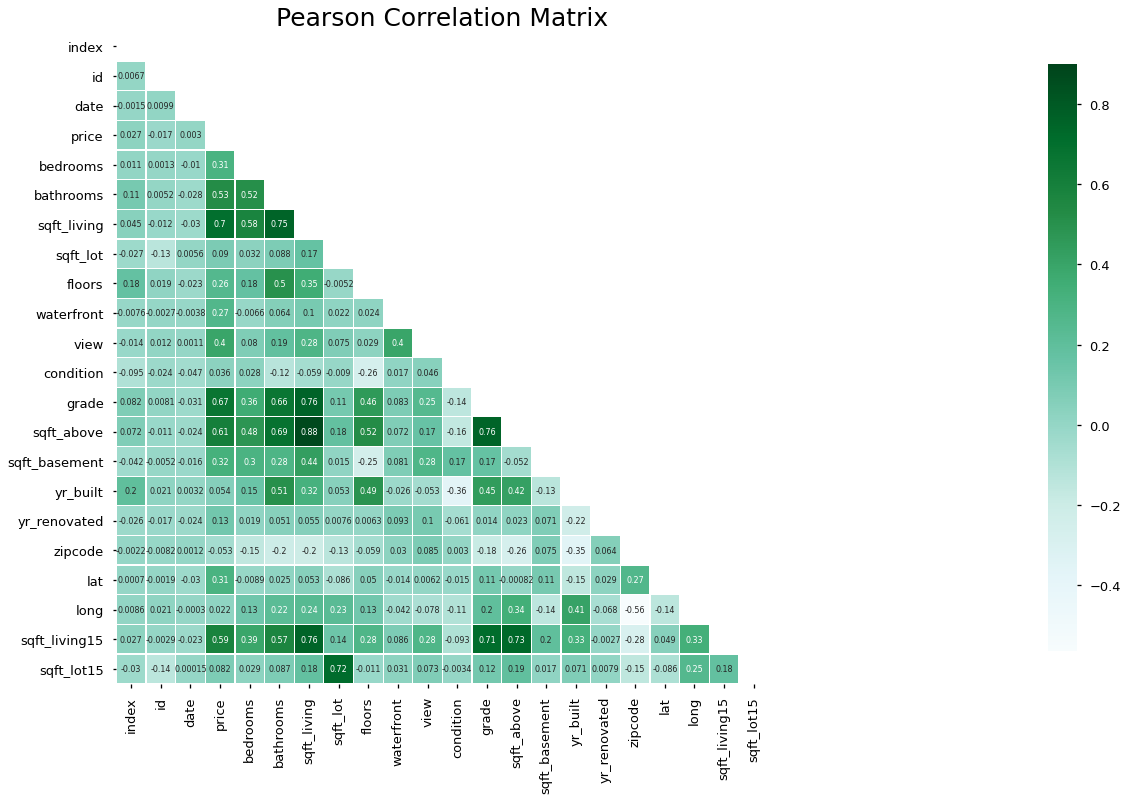

In [19]:
# 피어슨 상관계수 매트릭스
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

mask = np.zeros_like(df.corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(100, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(df.corr(),linewidths=0.25,vmax=0.9,square=True,cmap="BuGn",
            linecolor='w',annot=True,annot_kws={"size":8},
						mask=mask,cbar_kws={"shrink": .9});

In [20]:
df.columns[4:].tolist()

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [21]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

## 전진 선택법
variables = df.columns[4:].tolist() ## 설명 변수 리스트
 
y = df['price'] ## 반응 변수
selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = df[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break
print('빠진 feature :', set(variables) - set(selected_variables))

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


빠진 feature : {'floors'}


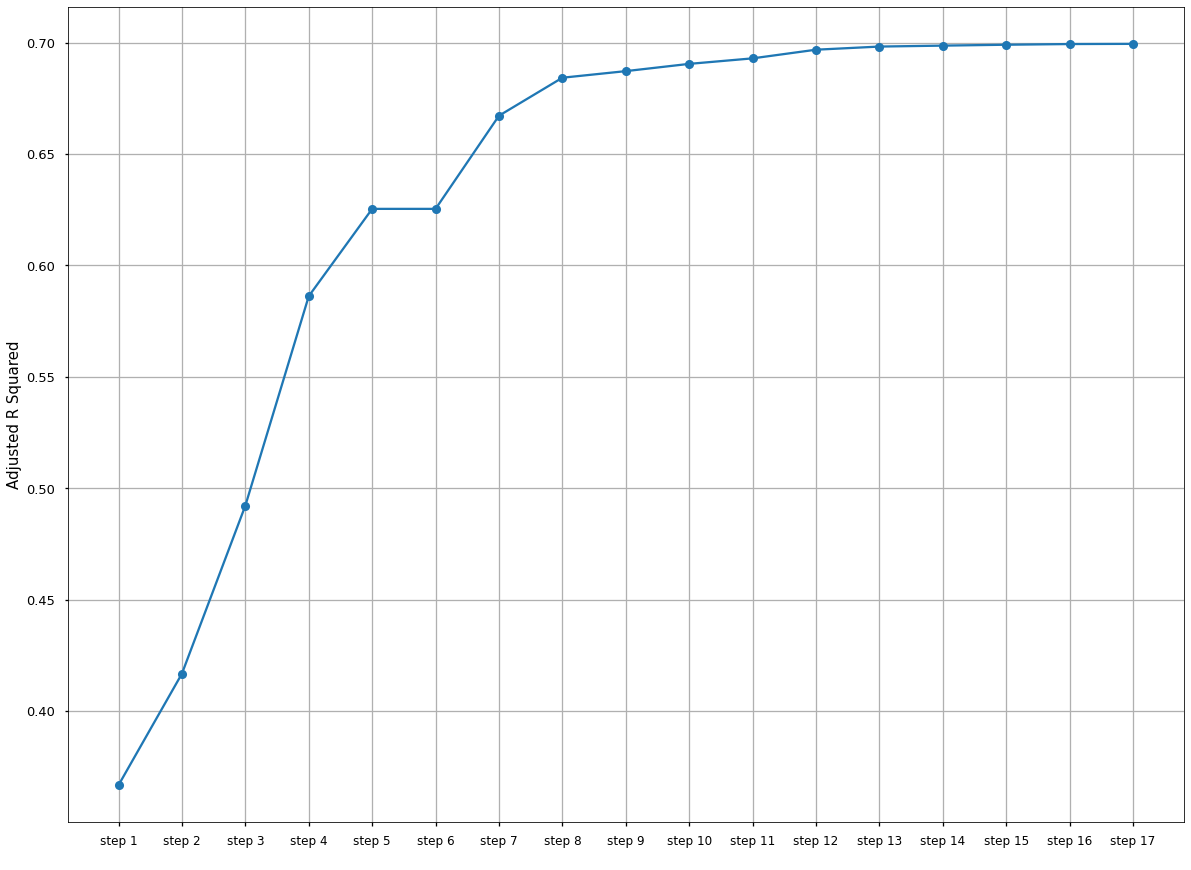

In [22]:
fig = plt.figure(figsize=(20,15));
fig.set_facecolor('white');
 
font_size = 15;
plt.xticks(steps,[f'step {s}\n' for i,s in enumerate(steps)], fontsize=12);
plt.plot(steps,adjusted_r_squared, marker='o');
    
plt.ylabel('Adjusted R Squared',fontsize=font_size);
plt.grid(True);
plt.show();

In [23]:
## 후진 소거법
variables = df.columns[4:].tolist() ## 설명 변수 리스트
 
y = df['price'] ## 반응 변수
selected_variables = variables ## 초기에는 모든 변수가 선택된 상태
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(selected_variables) > 0:
    X = sm.add_constant(df[selected_variables])
    p_vals = sm.OLS(y,X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
    max_pval = p_vals.max() ## 최대 p-value
    if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
        remove_variable = p_vals.idxmax()
        selected_variables.remove(remove_variable)
 
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break
print('빠진 feature :', set(variables) - set(selected_variables))

빠진 feature : set()


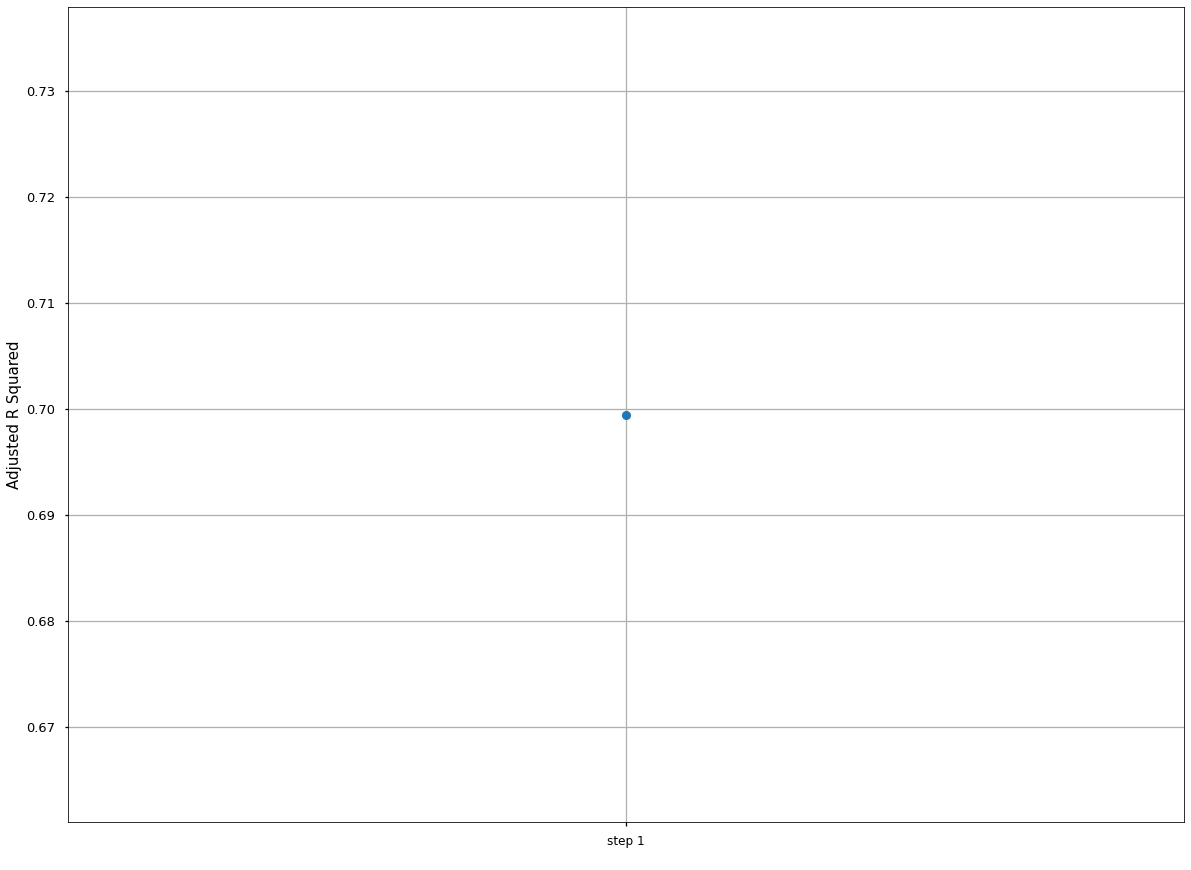

In [24]:
fig = plt.figure(figsize=(20,15))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n' for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

In [25]:
## 전진 단계별 선택법
variables = df.columns[4:].tolist() ## 설명 변수 리스트
 
y = df['price'] ## 반응 변수
selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = df[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(selected_variables) > 0:
            selected_X = df[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break
print('빠진 feature :', set(variables) - set(selected_variables))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  from ipykernel import kernelapp as app


빠진 feature : {'floors'}


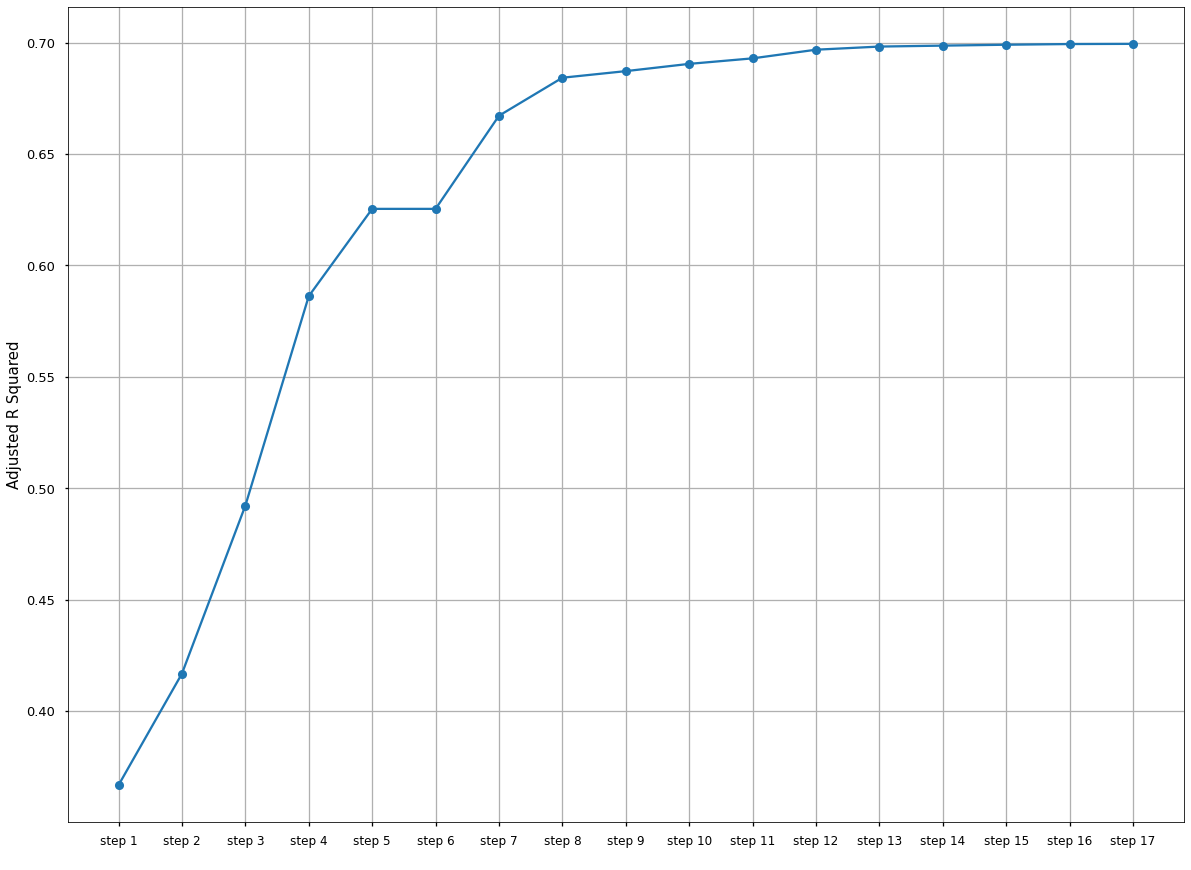

In [26]:
fig = plt.figure(figsize=(20,15))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n' for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

In [27]:
# 전진 단계 선택법으로 p-value가 높은 foor만 빼고 고른 feature들을 가지고 PCA 진행
print('Feature :', selected_variables)

# PCA 진행
def myPCA(n = 2):
  from sklearn.preprocessing import StandardScaler
  from sklearn.decomposition import PCA
  import pandas as pd
  feature = sorted(selected_variables)
  df[feature] = StandardScaler().fit_transform(df[feature])   # 데이터 feature 들의 표준화.
  pca = PCA(n_components = n) # 주성분을 입력받은 n개로 설정
  pc = pca.fit_transform(df[feature]) # pca 결과로 데이터 feature로 pc 값들 구함.
  
  # PCA 결과 printing 과정.
  pclist = []
  for i in range(n):
    pclist += ['PC{}'.format(i+1)]
  print('{}개의 성분이 전체 데이터 분산의 {}%를 설명 할수 있다.'.format(n, round(sum(pca.explained_variance_ratio_)*100, 1)))
  for i, j in zip(pclist, range(n)):
    print(i+'로 전체 분산의 {}%를 설명 할수 있다.'.format(round(pca.explained_variance_ratio_[j]*100, 1)))

  # 구한 데이터로 "Scree Plot" 그리기.
  import matplotlib.pyplot as plt
  PC_figure = pd.DataFrame(data = pc, columns = pclist)  # PC 리스트 dataframe에 입력
  
  plt.figure(figsize = (15, 10))
  plt.title('Scree Plot')
  plt.ylabel('Explained Variance Ratio')
  plt.bar(x = pclist, height= pca.explained_variance_ratio_)

def myPCAScree(n = 2):
  import pandas as pd
  from sklearn.decomposition import PCA
  pca = PCA(n_components = n) # 주성분을 입력받은 n개로 설정
  pc = pca.fit_transform(df.iloc[:, 4:]) # pca 결과로 데이터 feature로 pc 값들 구함.
  
  # PCA 결과 printing 과정.
  pclist = []
  for i in range(n):
    pclist += ['PC{}'.format(i+1)]
  print('{}개의 성분이 전체 데이터 분산의 {}%를 설명 할수 있다.'.format(n, round(sum(pca.explained_variance_ratio_)*100, 1)))
  for i, j in zip(pclist, range(n)):
    print(i+'로 전체 분산의 {}%를 설명 할수 있다.'.format(round(pca.explained_variance_ratio_[j]*100, 1)))

  # Scree plot 그리기
  num_pc = n    # pc의 개수

  # variance와 누적 variance
  variances = pca.explained_variance_ratio_
  cum_variances = np.cumsum(variances)

  # xticks를 위한 index
  idx = np.arange(num_pc) + 1

  plt.figure(figsize=(15, 10))
  ax = plt.subplot()

  plt.plot(idx, variances, color="skyblue")
  plt.plot(idx, cum_variances, color="orange", linestyle="dashed")

  for i in range(num_pc):
    plt.plot(idx[i], variances[i], "o", color="skyblue")

    ax.annotate( str(np.round(variances[i]*100, 1)),
                (idx[i], variances[i]+0.05),
                va="top", ha="center", fontsize=11)
    ax.annotate( str(np.round(cum_variances[i]*100, 1)),
                (idx[i], cum_variances[i]+0.05),
                va="top", ha="center", fontsize=11)
    
  plt.title("Scree Plot")
  plt.xlabel("Number of PC")
  plt.ylabel("Variance (%)")
  plt.legend(["Variance", "Cumulative value"])
  plt.show();
print('Feature :', sorted(selected_variables))

Feature : ['sqft_above', 'yr_built', 'lat', 'sqft_basement', 'view', 'sqft_living', 'grade', 'waterfront', 'bedrooms', 'bathrooms', 'zipcode', 'long', 'condition', 'sqft_living15', 'yr_renovated', 'sqft_lot15', 'sqft_lot']
Feature : ['bathrooms', 'bedrooms', 'condition', 'grade', 'lat', 'long', 'sqft_above', 'sqft_basement', 'sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'view', 'waterfront', 'yr_built', 'yr_renovated', 'zipcode']


17개의 성분이 전체 데이터 분산의 100.0%를 설명 할수 있다.
PC1로 전체 분산의 29.3%를 설명 할수 있다.
PC2로 전체 분산의 12.8%를 설명 할수 있다.
PC3로 전체 분산의 10.0%를 설명 할수 있다.
PC4로 전체 분산의 7.4%를 설명 할수 있다.
PC5로 전체 분산의 7.0%를 설명 할수 있다.
PC6로 전체 분산의 5.9%를 설명 할수 있다.
PC7로 전체 분산의 5.1%를 설명 할수 있다.
PC8로 전체 분산의 4.5%를 설명 할수 있다.
PC9로 전체 분산의 3.8%를 설명 할수 있다.
PC10로 전체 분산의 3.2%를 설명 할수 있다.
PC11로 전체 분산의 2.7%를 설명 할수 있다.
PC12로 전체 분산의 2.4%를 설명 할수 있다.
PC13로 전체 분산의 1.7%를 설명 할수 있다.
PC14로 전체 분산의 1.6%를 설명 할수 있다.
PC15로 전체 분산의 1.3%를 설명 할수 있다.
PC16로 전체 분산의 1.1%를 설명 할수 있다.
PC17로 전체 분산의 0.0%를 설명 할수 있다.


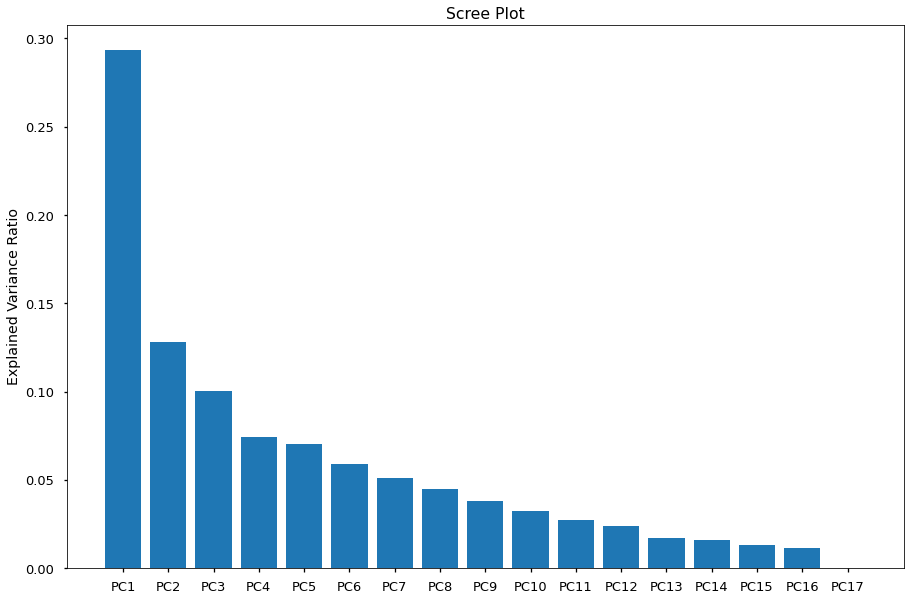

In [28]:
myPCA(17)

17개의 성분이 전체 데이터 분산의 100.0%를 설명 할수 있다.
PC1로 전체 분산의 29.3%를 설명 할수 있다.
PC2로 전체 분산의 12.8%를 설명 할수 있다.
PC3로 전체 분산의 10.0%를 설명 할수 있다.
PC4로 전체 분산의 7.4%를 설명 할수 있다.
PC5로 전체 분산의 7.0%를 설명 할수 있다.
PC6로 전체 분산의 5.9%를 설명 할수 있다.
PC7로 전체 분산의 5.1%를 설명 할수 있다.
PC8로 전체 분산의 4.5%를 설명 할수 있다.
PC9로 전체 분산의 3.8%를 설명 할수 있다.
PC10로 전체 분산의 3.2%를 설명 할수 있다.
PC11로 전체 분산의 2.7%를 설명 할수 있다.
PC12로 전체 분산의 2.4%를 설명 할수 있다.
PC13로 전체 분산의 1.7%를 설명 할수 있다.
PC14로 전체 분산의 1.6%를 설명 할수 있다.
PC15로 전체 분산의 1.3%를 설명 할수 있다.
PC16로 전체 분산의 1.1%를 설명 할수 있다.
PC17로 전체 분산의 0.0%를 설명 할수 있다.


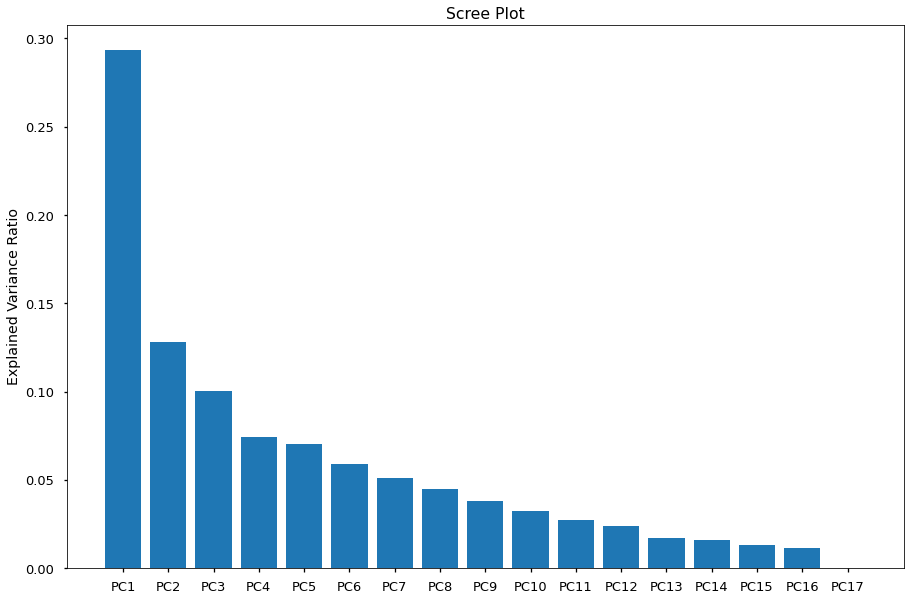

In [29]:
myPCA(17)

17개의 성분이 전체 데이터 분산의 100.0%를 설명 할수 있다.
PC1로 전체 분산의 29.2%를 설명 할수 있다.
PC2로 전체 분산의 12.6%를 설명 할수 있다.
PC3로 전체 분산의 10.0%를 설명 할수 있다.
PC4로 전체 분산의 7.4%를 설명 할수 있다.
PC5로 전체 분산의 6.9%를 설명 할수 있다.
PC6로 전체 분산의 5.8%를 설명 할수 있다.
PC7로 전체 분산의 5.0%를 설명 할수 있다.
PC8로 전체 분산의 4.5%를 설명 할수 있다.
PC9로 전체 분산의 3.7%를 설명 할수 있다.
PC10로 전체 분산의 3.2%를 설명 할수 있다.
PC11로 전체 분산의 2.8%를 설명 할수 있다.
PC12로 전체 분산의 2.3%를 설명 할수 있다.
PC13로 전체 분산의 1.7%를 설명 할수 있다.
PC14로 전체 분산의 1.6%를 설명 할수 있다.
PC15로 전체 분산의 1.3%를 설명 할수 있다.
PC16로 전체 분산의 1.1%를 설명 할수 있다.
PC17로 전체 분산의 0.7%를 설명 할수 있다.


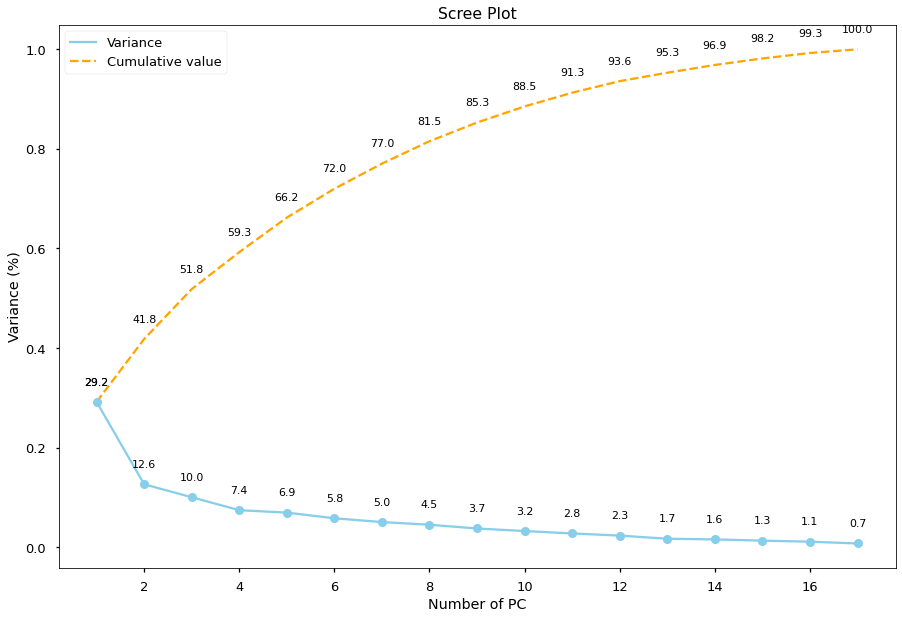

In [30]:
myPCAScree(17)

In [31]:
from sklearn.feature_selection import SelectPercentile

# SelectPercentile을 사용하여 특성의 50%를 선택하는 모델 생성
select = SelectPercentile(percentile=50)

# 특성 선택
select.fit(df.iloc[:,4:], df['price'])
train_data_selected = select.transform(df.iloc[:,4:])
train_data_selected

array([[ 0.1756067 , -0.11966179, -0.08717263, ..., -0.65868104,
        -0.69682569,  0.51569911],
       [ 0.50022075,  0.56629915, -0.08717263, ...,  1.37491944,
         0.88948493,  0.57406128],
       [ 0.50022075,  0.80584106, -0.08717263, ..., -0.65868104,
         0.139632  ,  1.21604518],
       ...,
       [-0.14900736, -0.22854447, -0.08717263, ..., -0.65868104,
         0.2529399 , -0.17005641],
       [-0.47362141, -0.75118138, -0.08717263, ...,  0.85522154,
         0.94794315, -1.55615801],
       [ 0.1756067 ,  1.81845006, -0.08717263, ...,  2.30133744,
         0.82741818,  0.26765988]])

In [32]:
df.iloc[:,4:]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,-0.398737,0.175607,-0.119662,0.482696,2.0,-0.087173,-0.305759,0.907554,1.142667,0.219316,-0.658681,0.204096,-0.210128,-0.952078,-0.696826,1.582789,0.515699,0.817899
1,-0.398737,0.500221,0.566299,-0.250050,1.0,-0.087173,-0.305759,0.907554,1.142667,-0.106743,1.374919,-0.681079,-0.210128,0.730045,0.889485,-1.321523,0.574061,-0.293678
2,1.751707,0.500221,0.805841,1.265369,2.0,-0.087173,-0.305759,-0.629187,0.291916,1.245797,-0.658681,0.272187,-0.210128,-0.914698,0.139632,1.341355,1.216045,1.303221
3,0.676485,0.500221,1.339366,-0.207800,2.0,-0.087173,-0.305759,-0.629187,0.291916,1.837533,-0.658681,1.395678,-0.210128,-0.241848,-0.325147,2.442011,0.574061,-0.284522
4,0.676485,0.175607,0.087215,-0.168712,1.0,-0.087173,-0.305759,-0.629187,0.291916,-0.855470,1.781640,-0.170401,-0.210128,-1.344574,-0.113687,0.262002,-0.199238,-0.138021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,-0.398737,-1.447464,-0.990723,-0.188002,1.0,-0.087173,-0.305759,-0.629187,-0.558836,-0.746784,-0.658681,-0.306581,-0.210128,2.057054,-0.660740,-0.483604,0.077983,-0.199551
21609,-1.473959,0.824835,-0.772958,-0.337207,2.0,-0.087173,-0.305759,-0.629187,0.291916,-0.855470,-0.003410,1.293542,-0.210128,1.029090,1.047539,-0.916766,-0.899584,-0.427727
21610,1.751707,-0.149007,-0.228544,-0.187423,1.5,-0.087173,-0.305759,-0.629187,-0.558836,0.098553,-0.658681,-0.374672,-0.210128,-1.325884,0.252940,0.496335,-0.170056,-0.187465
21611,-1.473959,-0.473621,-0.751181,-0.203695,1.0,-0.087173,-0.305759,-0.629187,-1.409587,-1.290215,0.855222,-1.021530,-0.210128,0.692665,0.947943,-0.668230,-1.556158,-0.233979


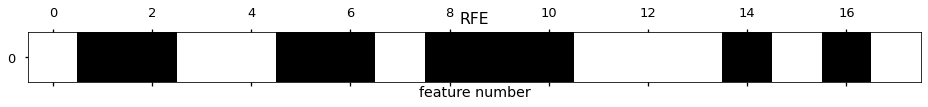

In [33]:
# 선택된 특성을 표시
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("feature number")
plt.yticks([0])
plt.title("RFE")
plt.show()

In [34]:
df.iloc[:,4:].iloc[:,mask]

,bathrooms,sqft_living,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15
0,0.175607,-0.119662,-0.087173,-0.305759,1.142667,0.219316,-0.658681,-0.696826,0.515699
1,0.500221,0.566299,-0.087173,-0.305759,1.142667,-0.106743,1.374919,0.889485,0.574061
2,0.500221,0.805841,-0.087173,-0.305759,0.291916,1.245797,-0.658681,0.139632,1.216045
3,0.500221,1.339366,-0.087173,-0.305759,0.291916,1.837533,-0.658681,-0.325147,0.574061
4,0.175607,0.087215,-0.087173,-0.305759,0.291916,-0.855470,1.781640,-0.113687,-0.199238
...,...,...,...,...,...,...,...,...,...
21608,-1.447464,-0.990723,-0.087173,-0.305759,-0.558836,-0.746784,-0.658681,-0.660740,0.077983
21609,0.824835,-0.772958,-0.087173,-0.305759,0.291916,-0.855470,-0.003410,1.047539,-0.899584
21610,-0.149007,-0.228544,-0.087173,-0.305759,-0.558836,0.098553,-0.658681,0.252940,-0.170056
21611,-0.473621,-0.751181,-0.087173,-0.305759,-1.409587,-1.290215,0.855222,0.947943,-1.556158


In [35]:
import pandas as pd
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kc_house_data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [36]:
df.iloc[:,4:].drop('long', axis = 1)

,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,sqft_living15,sqft_lot15
0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,1340,5650
1,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,1690,7639
2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,2720,8062
3,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,1360,5000
4,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,1530,1509
21609,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,1830,7200
21610,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,1020,2007
21611,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,1410,1287


In [37]:
X, y = df.iloc[:,4:].drop('long', axis = 1), df['price']

# 특성자동선택 SelectKBest(개수), SelectPercentile(비율)
def SelectKBest(X, y, n):
  from sklearn.feature_selection import SelectKBest, chi2
  
  select = SelectKBest(chi2, k=n)
  select.fit(X, y)

  X_selected = select.transform(X)

  print("X.shape: {} ".format(X.shape))
  print("X_selected.shape: {} ".format(X_selected.shape))
  mask = select.get_support()
  print('Mask : {}'.format(mask))
  print('{}개의 pvalue 값에 따른 최고 점수의 feature : {} 선택'.format(n, list(X.iloc[:,mask].columns)))
  display(X.iloc[:,mask])

In [38]:
SelectKBest(X, y, 2)

X.shape: (21613, 16) 
X_selected.shape: (21613, 2) 
Mask : [False False  True False False False False False False False False False
 False False False  True]
2개의 pvalue 값에 따른 최고 점수의 feature : ['sqft_lot', 'sqft_lot15'] 선택


,sqft_lot,sqft_lot15
0,5650,5650
1,7242,7639
2,10000,8062
3,5000,5000
4,8080,7503
...,...,...
21608,1131,1509
21609,5813,7200
21610,1350,2007
21611,2388,1287


In [40]:
import pandas as pd
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kc_house_data/kc_house_data.csv')

X, y = df.iloc[:,4:].drop('long', axis = 1), df['price']

# 특성자동선택 SelectKBest(개수), SelectPercentile(비율)
def SelectKBest(X, y, n):
  from sklearn.feature_selection import SelectPercentile, chi2
  
  select = SelectPercentile(chi2, percentile=50)
  select.fit(X, y)

  X_selected = select.transform(X)

  print("X.shape: {} ".format(X.shape))
  print("X_selected.shape: {} ".format(X_selected.shape))
  mask = select.get_support()
  print('Mask : {}'.format(mask))
  print('{}개의 pvalue 값에 따른 최고 점수의 feature : {} 선택'.format(n, list(X.iloc[:,mask].columns)))
  display(X.iloc[:,mask])

SelectKBest(X, y, 2)

X.shape: (21613, 16) 
X_selected.shape: (21613, 8) 
Mask : [False  True  True False False  True False False  True  True False  True
 False False  True  True]
2개의 pvalue 값에 따른 최고 점수의 feature : ['sqft_living', 'sqft_lot', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'sqft_living15', 'sqft_lot15'] 선택


,sqft_living,sqft_lot,view,sqft_above,sqft_basement,yr_renovated,sqft_living15,sqft_lot15
0,1180,5650,0,1180,0,0,1340,5650
1,2570,7242,0,2170,400,1991,1690,7639
2,770,10000,0,770,0,0,2720,8062
3,1960,5000,0,1050,910,0,1360,5000
4,1680,8080,0,1680,0,0,1800,7503
...,...,...,...,...,...,...,...,...
21608,1530,1131,0,1530,0,0,1530,1509
21609,2310,5813,0,2310,0,0,1830,7200
21610,1020,1350,0,1020,0,0,1020,2007
21611,1600,2388,0,1600,0,0,1410,1287


In [ ]:
# EDA를 자세히 진행하세요
# 특성공학 과정을 자세히 기술하세요
# 특성공학을 거친 특성을 포함해 다수의 특성을 사용한 모델을 학습하고 테스트 데이터에 대해 MSE, RMSE, MAE, R2 스코어를 계산하고 분석하세요
# 만들어진 회귀계수를 사용해 모델을 설명하세요.
# 모델이 과적합인지/과소적합인지 설명하세요.
# 메신저 general 채널에서 4개 스코어를 제시하고 본인이 고른 특성, 특성공학 방법 등을 간략하게 공유하세요

## 참고자료
* [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)
* ["A Few Useful Things to Know about Machine Learning"](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf)
* [Machine Learning and AI via Brain simulations](https://forum.stanford.edu/events/2011/2011slides/plenary/2011plenaryNg.pdf)
* [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf),  Chapter 3.1, Simple Linear Regression, & Chapter 3.2, Multiple Linear Regression
* [Brandon Foltz, Statistics 101: Simple Linear Regression](https://www.youtube.com/watch?v=ZkjP5RJLQF4)